<a href="https://colab.research.google.com/github/Stonepia/Scipy-Lec/blob/master/2_6_Image_manipulation_and_processing_using_Numpy_and_Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from scipy import ndimage
import numpy as np

# Opening and Writing to Image Files

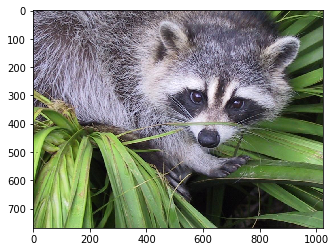

In [6]:
from scipy import misc
import imageio
f = misc.face()
imageio.imwrite('face.png',f) 

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

Creating a numpy array from an image file:

In [8]:
face = imageio.imread('face.png')
type(face)

imageio.core.util.Array

In [9]:
face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

Opening raw files (camera, 3-D images)

In [11]:
face.tofile('face.raw') # Create raw file
face_from_raw = np.fromfile('face.raw', dtype = np.uint8)
face_from_raw.shape

(2359296,)

In [0]:
face_from_raw.shape = (768, 1024, 3)

Need to know the shape and dtype of the image (how to separate data bytes).

For large data, use np.memmap for memory mapping:



In [0]:
face_memmap = np.memmap('face.raw', dtype=np.uint8, shape=(768,1024,3))

(data are read from the file, and not loaded into memory)

Working on a list of image files

In [0]:
for i in range(10):
    im = np.random.randint(0, 256, 10000).reshape((100, 100))
    img = im.astype('uint8') # Convert uint64 to uint8
    imageio.imwrite('random_%02d.png' % i, img)
from glob import glob
filelist = glob('random*.png')
filelist.sort()

# Displaying Images

Use `matplotlib` and `imshow` to display an image inside a `matplotlib` figure:

(-0.5, 1023.5, 767.5, -0.5)

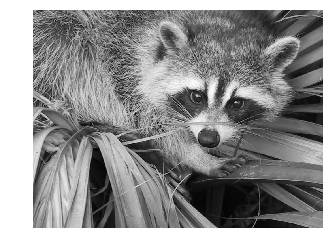

In [24]:
f = misc.face(gray=True)
import matplotlib.pyplot as plt
plt.imshow(f,cmap=plt.cm.gray)
plt.axis('off')

Increase contrast by setting min and max values:



(-0.5, 1023.5, 767.5, -0.5)

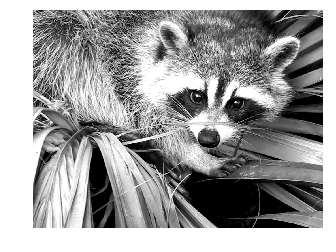

In [25]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)
plt.axis('off')

Draw contour lines:

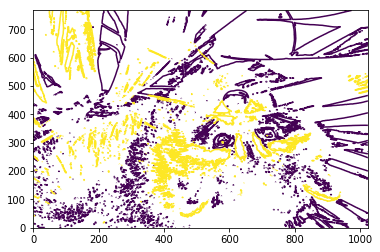

In [29]:
plt.contour(f, [50, 200])        

For smooth intensity variations, use `interpolation='bilinear'`. For fine inspection of intensity variations, use `interpolation='nearest'`:

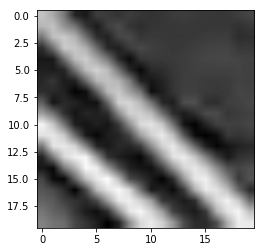

In [31]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='bilinear')        

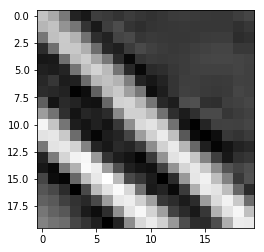

In [32]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='nearest')

# Basic manipulations

![axis_convention](https://scipy-lectures.org/_images/axis_convention.png)

In [33]:
face = misc.face(gray=True)
face[0, 40]

127

In [34]:
# Slicing
face[10:13, 20:23]

array([[141, 153, 145],
       [133, 134, 125],
       [ 96,  92,  94]], dtype=uint8)

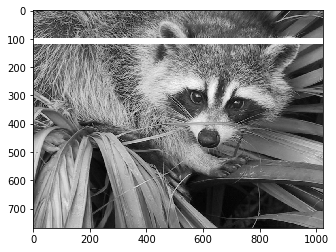

In [38]:
face[100:120] = 255
plt.imshow(face, cmap=plt.cm.gray)

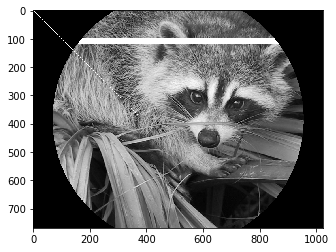

In [40]:
lx , ly = face.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X-lx/2)**2 + (Y-ly/2)**2 > lx*ly/4
face[mask] = 0
face[range(400), range(400)] =255
plt.imshow(face, cmap=plt.cm.gray)

##  Geometrical transformations

In [0]:
face = misc.face(gray=True)
lx, ly = face.shape
# Cropping
crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_face = np.flipud(face)
# rotation
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)

# Image Filtering

Local filters: replace the value of pixels by a function of the values of neighboring pixels.

Neighbourhood: square (choose size), disk, or more complicated structuring element.

## Blurring/smoothing

Gaussian filter from scipy.ndimage:

(-0.5, 1023.5, 767.5, -0.5)

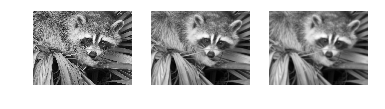

In [48]:
from scipy import misc
face = misc.face(gray=True)
blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred = ndimage.gaussian_filter(face, sigma=5)


plt.subplot(131)
plt.axis('off')
plt.imshow(face, cmap=plt.cm.gray)
plt.subplot(132)
plt.axis('off')
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.subplot(133)
plt.imshow(very_blurred, cmap=plt.cm.gray)
plt.axis('off')

Uniform filter

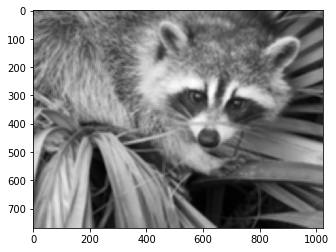

In [50]:
local_mean = ndimage.uniform_filter(face, size=11)
plt.imshow(local_mean, cmap=plt.cm.gray)

## Sharpening

In [0]:
from scipy import misc
face = misc.face(gray=True).astype(float)
blurred_f = ndimage.gaussian_filter(face, 3)

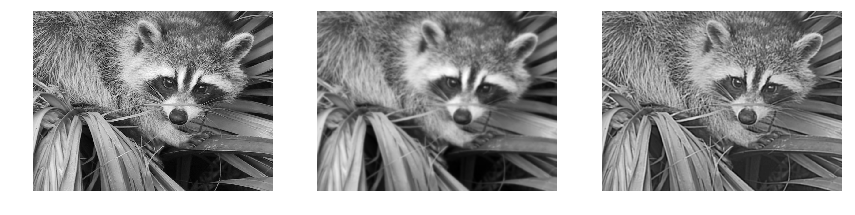

In [72]:
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(blurred_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

## Denoising

In [0]:
# Noisy face
from scipy import misc
f = misc.face(gray=True)
f = f[230:290, 220:320]
noisy = f + 0.4 * f.std() * np.random.random(f.shape)

A Gaussian filter smoothes the noise out… and the edges as well:

In [0]:
gauss_denoised = ndimage.gaussian_filter(noisy, 2)

Most local linear isotropic filters blur the image (ndimage.uniform_filter)

A median filter preserves better the edges:

In [0]:
med_denoised = ndimage.median_filter(noisy, 3)

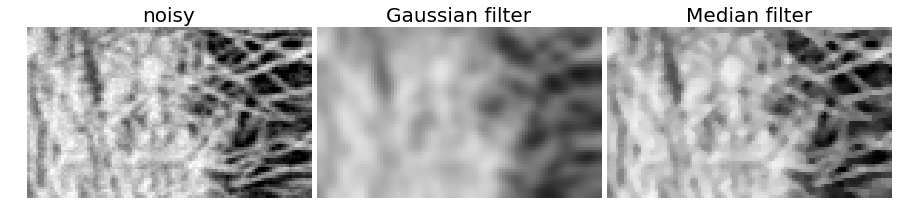

In [67]:
plt.figure(figsize=(12,2.8))

plt.subplot(131)
plt.imshow(noisy, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('noisy', fontsize=20)
plt.subplot(132)
plt.imshow(gauss_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Gaussian filter', fontsize=20)
plt.subplot(133)
plt.imshow(med_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Median filter', fontsize=20)

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()

Median filter: better result for straight boundaries (**low curvature**):

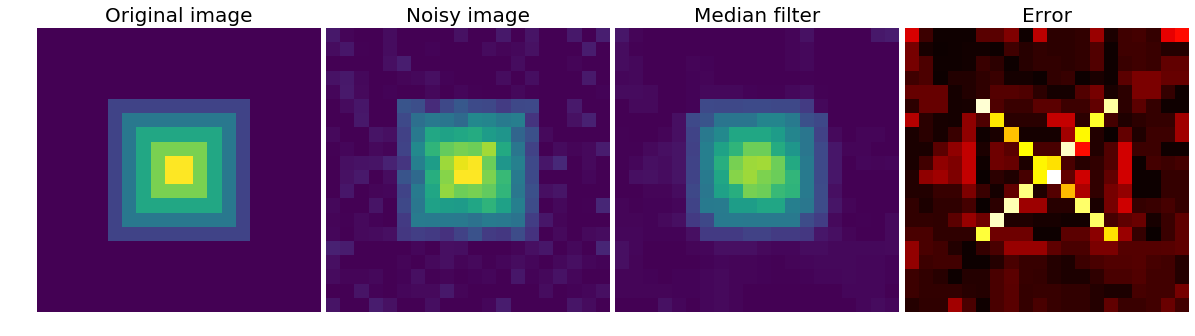

In [73]:
im = np.zeros((20, 20))
im[5:-5, 5:-5] = 1
im = ndimage.distance_transform_bf(im)
im_noise = im + 0.2*np.random.randn(*im.shape)

im_med = ndimage.median_filter(im_noise, 3)

plt.figure(figsize=(16, 5))

plt.subplot(141)
plt.imshow(im, interpolation='nearest')
plt.axis('off')
plt.title('Original image', fontsize=20)
plt.subplot(142)
plt.imshow(im_noise, interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.title('Noisy image', fontsize=20)
plt.subplot(143)
plt.imshow(im_med, interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.title('Median filter', fontsize=20)
plt.subplot(144)
plt.imshow(np.abs(im - im_med), cmap=plt.cm.hot, interpolation='nearest')
plt.axis('off')
plt.title('Error', fontsize=20)


plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)

plt.show()

##  Mathematical morphology 

# Feature extraction

# Mearing objects properties

Synthetic data:

In [0]:
np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))
mask = im > im.mean()

**Analysis of connected components**

Label connected components: `ndimage.label`:

In [88]:
label_im, nb_labels = ndimage.label(mask)
nb_labels # how many regions?

28

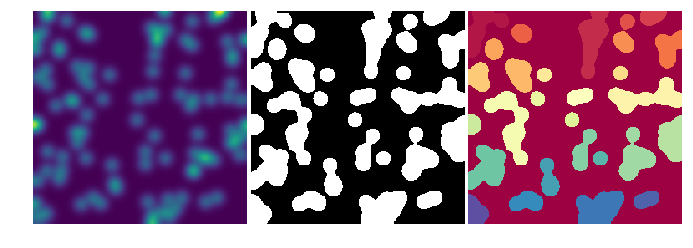

In [89]:
plt.figure(figsize=(9,3))

plt.subplot(131)
plt.imshow(im)
plt.axis('off')
plt.subplot(132)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(label_im, cmap=plt.cm.Spectral)
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=1)
plt.show()

SEE MORE FROM HERE

**[...](https://scipy-lectures.org/advanced/image_processing/index.html#measuring-objects-properties-ndimage-measurements)**